Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что тебе удалось разобраться с техникой бутстрапа.
* Отлично, что доверительный интервал и риск убытков посчитаны верно.
* Редко, кто сдает эту работу с первого раза, молодец!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Удачи в дальнейшем обучении и следующих работах!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

Откроем фрэймы

In [2]:
try:
    df1 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    df1 = pd.read_csv('geo_data_0.csv')

In [3]:
try:
    df2 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    df2 = pd.read_csv('geo_data_1.csv')

In [4]:
try:
    df3 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df3 = pd.read_csv('geo_data_2.csv')

Посмотрим содержимое

In [5]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [6]:
dfs = [df1, df2, df3]
for df in dfs:
    print('Название датафрейма: ',get_df_name(df))
    display(df.info())
    display('Корреляция',df[['id', 'f0', 'f1', 'f2']].corr())
    display('Количество явных дубликтов:', df.duplicated().sum())
    print('-' * 50)

Название датафрейма:  df1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'Корреляция'

,f0,f1,f2
f0,1.000000,-0.440723,-0.003153
f1,-0.440723,1.000000,0.001724
f2,-0.003153,0.001724,1.000000


'Количество явных дубликтов:'

0

--------------------------------------------------
Название датафрейма:  df2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'Корреляция'

,f0,f1,f2
f0,1.000000,0.182287,-0.001777
f1,0.182287,1.000000,-0.002595
f2,-0.001777,-0.002595,1.000000


'Количество явных дубликтов:'

0

--------------------------------------------------
Название датафрейма:  df3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'Корреляция'

,f0,f1,f2
f0,1.000000,0.000528,-0.000448
f1,0.000528,1.000000,0.000779
f2,-0.000448,0.000779,1.000000


'Количество явных дубликтов:'

0

--------------------------------------------------


Все таблицы имеют нормальную структуру, не имеют нулевых значений.

id — уникальный идентификатор скважины;
f0, f1, f2 — три признака(неважно, что они означают, но сами признаки значимы);
product — объём запасов в скважине (тыс. баррелей).
В первом датафрейме наблюдается значительная отрицательная корреляция между 0 и 1 признаком. В остальных датафреймах корреляции несущественны.
Явных дубликатов в таблицах не обнаружено.

<AxesSubplot:>

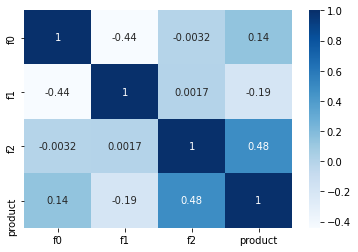

In [7]:
sns.heatmap (df1.corr(), cmap='Blues', annot=True)

<AxesSubplot:>

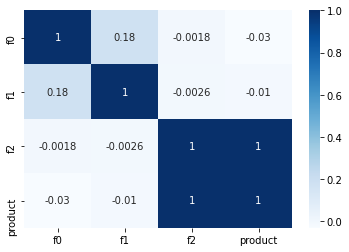

In [8]:
sns.heatmap (df2.corr(), cmap='Blues', annot=True)

<AxesSubplot:>

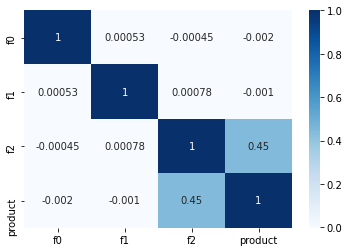

In [9]:
sns.heatmap (df3.corr(), cmap='Blues', annot=True)

Удалим колонку с индентификатором т.к. она не на что не влияет и только усложнит работу.

In [10]:
df1 = df1.drop(columns=['id'])
df2 = df2.drop(columns=['id'])
df3 = df3.drop(columns=['id'])

Изучим гистограммы по столбцу product:

In [11]:
def oil_hist(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[12,9])
    plt.hist(seria, bins=bins)
    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])
    plt.xlabel("Объем нефти на скважину, тыс. барелей")
    plt.ylabel("Количество скважин")
    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

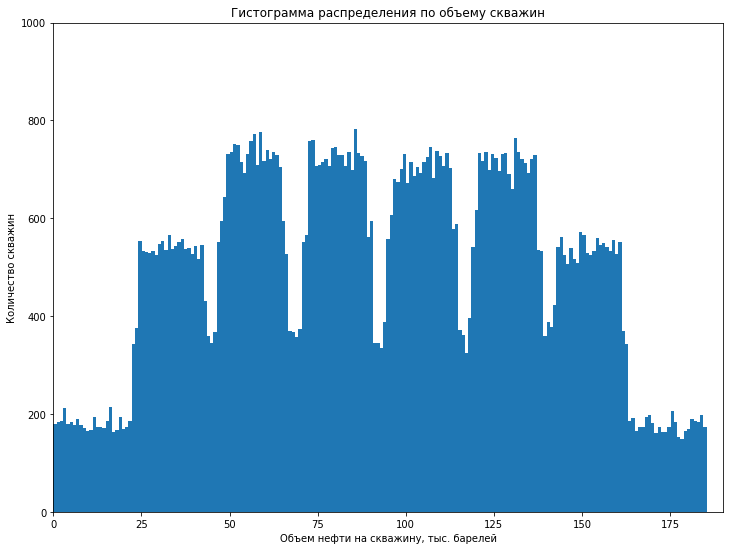

In [12]:
oil_hist(df1['product'], 200, 190, 1000)

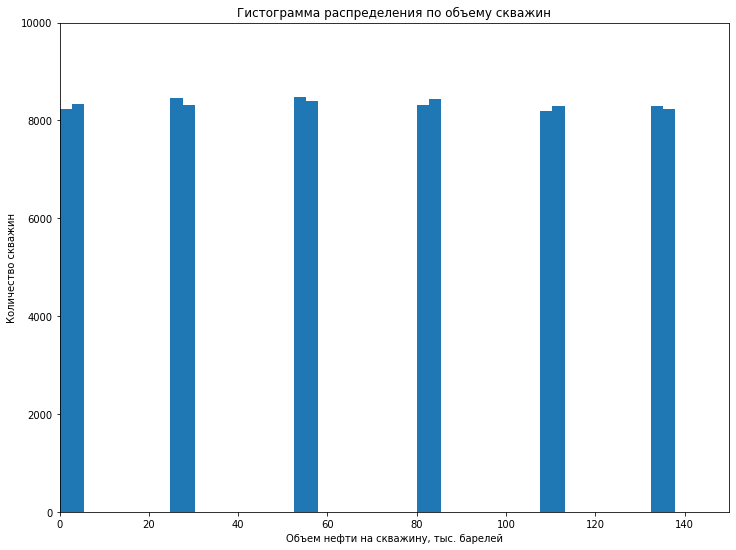

In [13]:
oil_hist(df2['product'], 50, 150, 10000)

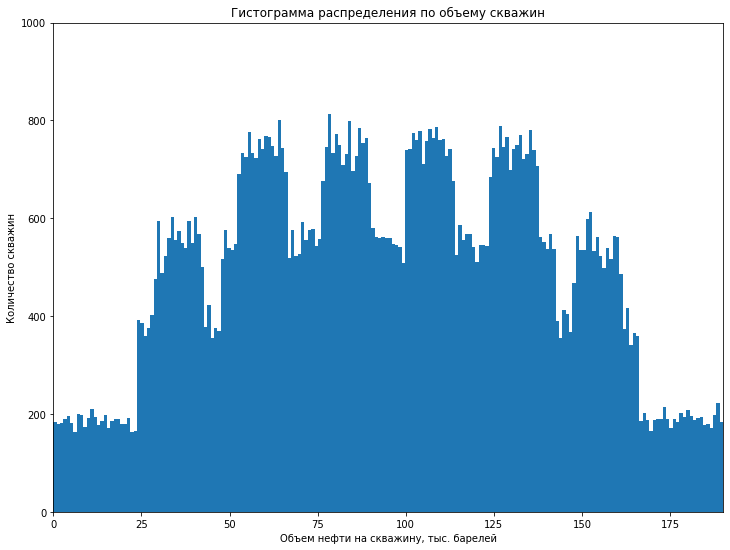

In [14]:
oil_hist(df3['product'], 200, 190, 1000)

Ознакомившись с данными мы увидели многое в частности:

Все таблицы имеют одинаковую, нормальную структуру, и не имеют пустых значений.
В каждой отдельно взятой таблице отсутсуют явные дубликаты.
Анализ на корреляцию внутри данных выявил, что во втором и третьем датафрейме объектов с сильной корреляцией (положительной или отрицательной) нет. А вот в первом датафрейме наблюдается взаимосвзять между первым и вторым признаком. То есть чем ниже один признак тем ниже второй. 
В каждой таблице присутствует столбец с идентификатором скважины для построения нашей модели этот признак не нужен, поэтому мы его убрали. На графиках отчётливо видно аномально большие показатели во 2 датафрэйме.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Согласен, что колонка id нам не нужна. Радует, что распределения и корреляции были визуализированы!
</div>

## Обучение и проверка модели

Разобъём данные на обучающую и валидационную выборки в соотношении 75:25.
Обучим модель и сделаем предсказания на валидационной выборке;
Сохраним предсказания и правильные ответы на валидационной выборке;
Напечатаем на экране средний запас предсказанного сырья и RMSE модели.

Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

In [15]:
def tar_feat(df):
    target = df['product']
    features = df.drop('product', axis=1)
    return features, target

In [16]:
def train_valid(df):
    features,target = tar_feat(df)
    
    train_features, valid_features, train_target, valid_target = train_test_split(
    features, target, test_size=.75, random_state=12345)
    
    return train_features, valid_features, train_target, valid_target

In [17]:
def model_tr_val(df):
    model = LinearRegression()
    features, target = tar_feat(df)
    train_features, valid_features, train_target, valid_target = train_valid(df)
    
    model.fit(train_features, train_target)
    predict = model.predict(valid_features)
    rmse = mean_squared_error(valid_target, predict) ** 0.5
    predict_mean = 'Средний запас сырья по датафрейму в предсказаниях:', predict.mean()
    rmse_total = 'RMSE региона:' + str(rmse) 
    return predict_mean, rmse_total

In [18]:
model_tr_val(df1)

(('Средний запас сырья по датафрейму в предсказаниях:', 92.56773277214636),
 'RMSE региона:37.70188872577138')

In [19]:
model_tr_val(df2)

(('Средний запас сырья по датафрейму в предсказаниях:', 68.81242584773999),
 'RMSE региона:0.8914237412897416')

In [20]:
model_tr_val(df3)

(('Средний запас сырья по датафрейму в предсказаниях:', 94.94516837037592),
 'RMSE региона:40.03777476932527')

На втором шаге мы сделали:

Разделили для каждого датафрейма выборки на обучающую и валидную в соотношении 1 к 4.
Обучили модель линейной регрессии для каждого датафрейма на обучающей выборке и предсказали на валидной.
Посчитали среднеквадратичную ошибку для каждого. Для второго региона получили очень низкую ошибку. Можно сделать вывод, данные в этои дф самые репрезентативные и "полезные" для обечения и предсказания модели.

<div class="alert alert-block alert-info">
<b>Совет: </b> Перед обучением линейных моделей желательно нормализовать признаки, при этом scaler должен быть обучен только на треине.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Радует, что ты активно используешь функции. Это помогает избежать дублирования кода, а значит уменьшает вероятность совершить ошибку/опечатку!
</div>

## Подготовка к расчёту прибыли

Условия: При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
Все ключевые значения для расчётов сохраним в отдельных переменных.
Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

In [21]:
BUDGET = 10000 #Бюджет на разработку скважин в регионе, тыс.руб
INCOME_ONE_PROD = 0.45 #Доход с каждой единицы продукта, тыс.руб
target_probability_losses = 2.5/100 # вероятность убытков
product_mean_0 = df1['product'].mean()
product_mean_1 = df2['product'].mean()
product_mean_2 = df3['product'].mean()
print('Cредний запас сырья в 1 регионе: %.2f млн.баррелей'%product_mean_0)
print('Cредний запас сырья в 2 регионе: %.2f млн.баррелей'%product_mean_1)
print('Cредний запас сырья в 3 регионе: %.2f млн.баррелей'%product_mean_2)

Cредний запас сырья в 1 регионе: 92.50 млн.баррелей
Cредний запас сырья в 2 регионе: 68.83 млн.баррелей
Cредний запас сырья в 3 регионе: 95.00 млн.баррелей


In [22]:
budg_per_1_point=(BUDGET/200)# тыс.руб
print('Бюджет на разработку одной лучшей скважины:', budg_per_1_point,'тыс.руб')

Бюджет на разработку одной лучшей скважины: 50.0 тыс.руб


In [29]:
WELL_BUDGET = BUDGET/0.45
# достаточный объём сырья для безубыточной разработки новой скважины
BREAK_EVEN = WELL_BUDGET / 200
print('Объём каждой скважины для безубыточной разработки должен составлять не менее: %.2f'%BREAK_EVEN,'тыс.баррелей')

Объём каждой скважины для безубыточной разработки должен составлять не менее: 111.11 тыс.баррелей


То есть для самоокупаемости средний запас на скажину должен быть чуть более 111 тыс. баррелей  у всех 3-х регионов предсказанный запас ниже безубыточного.

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели



<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

In [24]:
def profit(target, predictions):
    # Выбираем топовые предсказания
    preds_sorted  = predictions.sort_values(ascending=False)
    # Суммируем соответствующие топ-200 реальные значения, считаем выручку и вычитаем бюджетные расходы
    selected = target[preds_sorted.index][:200].sum()
    return selected * 0.45 - BUDGET

Вывод: Мы рассчитали достаточный объем сырья для безубыточной разработки новой скважины, для этого у нас выбраны 200 точек для разработки, и на эти точки 10 млрд рублей. В результате расчётов мы получили цифру безубыточности 111 тыс.баррелей. По итогу, по всем предсказанным моделям никто из них эту черту не пересечёт.
Также мы написали функцию для расчёта прибыли по выбранным скважинам и предсаказаниям модели

## Расчёт прибыли и рисков 

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [25]:
def bootstrap(df):
    model = LinearRegression()
    features, target = tar_feat(df)
    train_features, valid_features, train_target, valid_target = train_valid(df)
    
    model.fit(train_features, train_target)
    state = RandomState(12345)
    predict = model.predict(valid_features)
    predict = pd.Series(predict)
    valid_target.reset_index(drop=True, inplace=True)
    values = []
    for i in range(1000):
        target_subsample = valid_target.sample(
            n = 500, 
            replace = True, 
            random_state=state)
        predict_sample = predict[target_subsample.index]

        values.append(profit(target_subsample,predict_sample))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975) 
    risk = (values < 0).mean()
    mean = values.mean() 
        
    return  f'Средняя выручка: {mean}',  f'-2,5%-квантиль: {lower}' , f'+2,5%-квантиль: {upper}' ,f'Риск: {risk:.2%}',f'Размах интервала:{(upper-lower)}'

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подсчета доверительного интервала использовался именно метод квантилей!
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Риск найден очень элегантно.
</div>

In [26]:
bootstrap(df1)

('Средняя выручка: 444.48140534475226',
 '-2,5%-квантиль: -80.99876718613217',
 '+2,5%-квантиль: 935.3768100621168',
 'Риск: 4.80%',
 'Размах интервала:1016.3755772482489')

In [27]:
bootstrap(df2)

('Средняя выручка: 477.01901392440857',
 '-2,5%-квантиль: 43.94819723158603',
 '+2,5%-квантиль: 928.8123535942925',
 'Риск: 1.20%',
 'Размах интервала:884.8641563627065')

In [28]:
bootstrap(df3)

('Средняя выручка: 385.9155321056723',
 '-2,5%-квантиль: -122.44020484745636',
 '+2,5%-квантиль: 874.8417830900089',
 'Риск: 7.00%',
 'Размах интервала:997.2819879374653')

Применив технику Bootstrap с 1000 выборок мы нашли среднюю прибыль, 95%-й доверительный интервал и риск убытков
По результатам лучше всех себя показал второй регион. У него (по сравнению с другмими) наименьший доверительный интервал, но также и самый маленьких риск. К слову когда мы обучали модель линейной регрессии лучший результат также был у второго региона. Причём запасов сырья у них (по предскзанию) меньше всего. Подозреваю, что это связано, но как именно пока не могу осознать.

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта! С выбором региона согласен. В этом регионе мы предсказываем точнее, но в нем меньше запасов нефти в среднем. Несмотря на это, он получился наиболее прибыльным.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован